<a href="https://colab.research.google.com/github/nord-ouestadvisors/finta/blob/master/InvestGuard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [3]:
trnx_url = 'https://raw.githubusercontent.com/Nord-ouest-Advisors/InvestGuard/main/data/SampleTransactions.csv?token=ATIZFFUXOULHEXVCG5VTDK3AYTMX4'
prices_url = 'https://raw.githubusercontent.com/Nord-ouest-Advisors/InvestGuard/main/data/Prices.csv?token=ATIZFFRCZCTBXBLXDKUQXTTAYTM2E'
info_url = 'https://raw.githubusercontent.com/Nord-ouest-Advisors/InvestGuard/main/data/FundsInfo.csv'

In [36]:
def get_transactions(url):
    trnx = pd.read_csv(url)
    trnx['InstructionDate'] = pd.to_datetime(trnx['InstructionDate'])
    trnx.sort_values(by=['FundPortfolio','InstructionDate'], inplace=True)
    return trnx

def get_prices(url):
    prices = pd.read_csv(url)
    prices['Date'] = pd.to_datetime(prices['Date'])
    prices.sort_values(by=['FundISIN', 'Date'], inplace=True)
    prices.reset_index(inplace=True)
    return prices

def get_funds_info(url):
    info = pd.read_csv(info_url)
    return info

In [37]:
trnx = get_transactions(trnx_url)
prices = get_prices(prices_url)
info = get_funds_info(info_url)

In [38]:
prices

,index,Date,FundISIN,FundNAV
0,8603,2000-06-30,LU0106817157,9.1296
1,8602,2000-07-03,LU0106817157,9.2596
2,8601,2000-07-04,LU0106817157,9.3414
3,8600,2000-07-05,LU0106817157,9.2565
4,8599,2000-07-06,LU0106817157,9.2791
...,...,...,...,...
68271,17412,2021-05-19,LU1983299246,163.2020
68272,17411,2021-05-20,LU1983299246,165.1040
68273,17410,2021-05-21,LU1983299246,168.1748
68274,17409,2021-05-24,LU1983299246,168.5143


Functions to compute financial quantities

In [41]:
def daily_returns(data):
    """Returns DataFrame with daily returns (percentage change)
    :math:`\\displaystyle R = \\dfrac{\\text{price}_{t_i} - \\text{price}_{t_{i-1}}}{\\text{price}_{t_{i-1}}}`
    :Input:
     :data: ``pandas.DataFrame`` with daily stock prices
    :Output:
     :ret: a ``pandas.DataFrame`` of daily percentage change of Returns
         of given stock prices.
    """
    return data.pct_change().dropna(how="all").replace([np.inf, -np.inf], np.nan)

def cumulative_returns(data, dividend=0):
    """Returns DataFrame with cumulative returns
    :math:`\\displaystyle R = \\dfrac{\\text{price}_{t_i} - \\text{price}_{t_0} + \\text{dividend}}{\\text{price}_{t_0}}`
    :Input:
     :data: ``pandas.DataFrame`` with daily stock prices
     :dividend: ``float`` (default= ``0``), paid dividend
    :Output:
     :ret: a ``pandas.DataFrame`` of cumulative Returns of given stock prices.
    """
    if isinstance(data, pd.Series):
        data = pd.DataFrame(data)
    return data.dropna(axis=0, how="any").apply(lambda x: (x - x[0] + dividend) / x[0])

def cumulative_returns_v2(data):
    pass

In [42]:
portfolio_dict = {
    user:{
        portfolio:{
            'transactions':trnx[trnx['FundPortfolio']==portfolio], 
            'prices':prices[prices['FundISIN']==isin], 
            'info':info[info['FundISIN']==isin]
            } 
          for portfolio in trnx['FundPortfolio'].unique() 
          for isin in trnx['FundISIN'].unique()
          } 
          for user in trnx['CustomerID'].unique()
          }


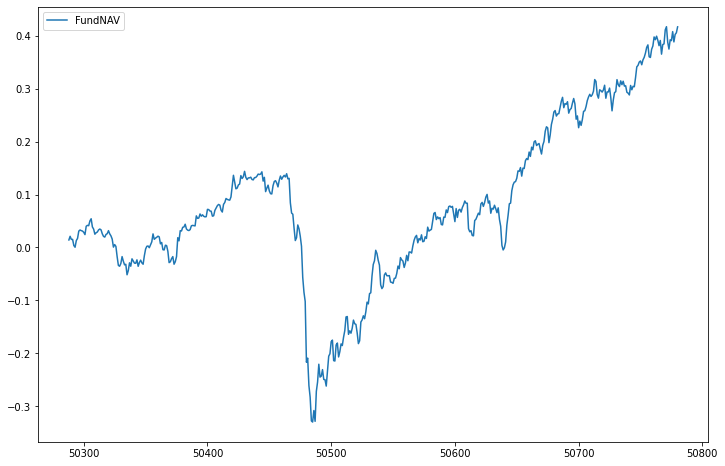

In [45]:
df = portfolio_dict['Admin']['PopularPortfolio_03']['prices']
df.sort_index(inplace=True)
ax = ((1+df['FundNAV'].pct_change()).cumprod()-1).plot(figsize=(12,8), legend=True)